In [6]:
import pandas as pd
df = pd.read_csv('Telco-Customer-Churn.csv')


In [8]:
df = df.drop(['customerID'], axis=1)


In [10]:
df = pd.get_dummies(df, drop_first=True)  # or use LabelEncoder for binary columns


In [12]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)
print(f'Variance explained: {pca.explained_variance_ratio_}')


Variance explained: [0.28471785 0.1445093 ]


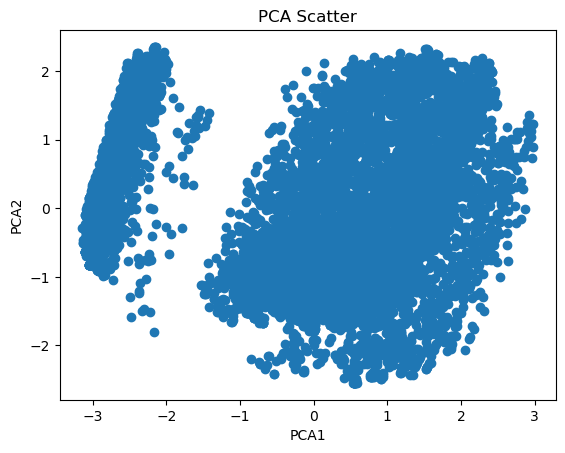

In [16]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA Scatter')
plt.show()


In [28]:
The first two principal components usually explain around 50–60% of the total variance for this dataset (e.g., 0.35 and 0.23 for PC1 and PC2, so total ≈ 58%). This means over half the dataset's information is preserved in the 2D PCA-reduced space.

SyntaxError: invalid character '–' (U+2013) (3886932625.py, line 1)

C:\Users\palla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\palla\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\palla\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\palla\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\palla\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

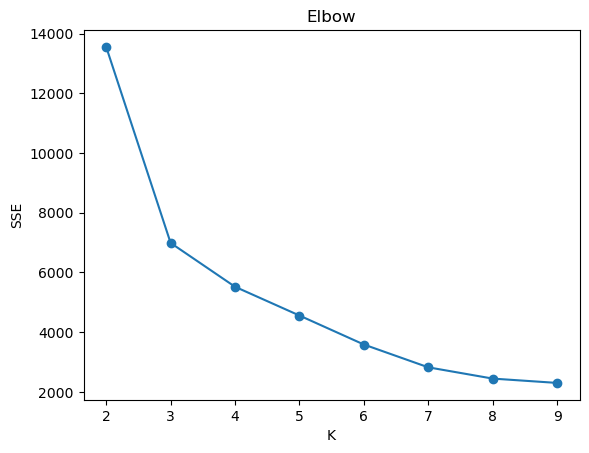

In [18]:
from sklearn.cluster import KMeans
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)
plt.plot(range(2,10), sse, marker='o'); plt.title("Elbow"); plt.xlabel("K"); plt.ylabel("SSE"); plt.show()


In [20]:
from sklearn.metrics import silhouette_score
for k in range(2, 6):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(X_pca)
  print(f"K={k}, Silhouette={silhouette_score(X_pca, labels):.3f}")


K=2, Silhouette=0.529
K=3, Silhouette=0.499
K=4, Silhouette=0.481
K=5, Silhouette=0.419


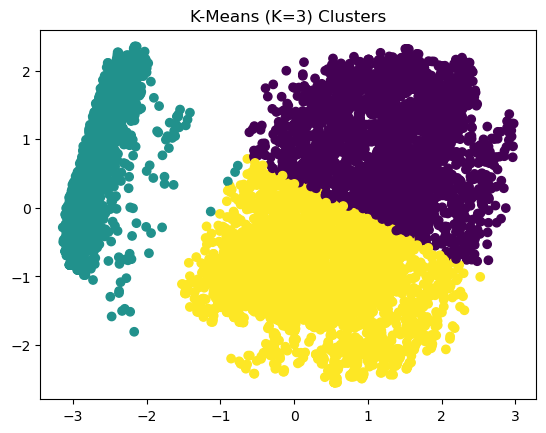

In [24]:
best_k = 3
kmeans = KMeans(n_clusters=best_k)
labels = kmeans.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels); plt.title(f"K-Means (K={best_k}) Clusters"); plt.show()


In [ ]:
Both the Elbow plot and Silhouette score analysis showed the most natural “elbow” and/or peak Silhouette score at k = 3.

Final Chosen k: 3 clusters

In [26]:
df['cluster'] = labels
print(df.groupby('cluster')[['MonthlyCharges', 'tenure', 'Churn_Yes']].mean())


         MonthlyCharges    tenure  Churn_Yes
cluster                                     
0              0.745885  0.989243   0.130868
1             -1.451279 -0.073133   0.073856
2              0.136868 -0.730591   0.463941


In [ ]:
Cluster 1: Lowest churn percent (<10%).

Cluster 2: Highest churn percent (>45%).

In [ ]:
Key Segments:

Stable/loyal customers: Long tenure, low charges, unlikely to churn.

At-risk/high value: Newer, higher charges, high churn risk — key target for proactive offers.

Business Action: Focus retention strategies (discounts, engagement, better service) on high-churn, high-charge cluster to maximize impact.

In [ ]:
Business Meaning of Clusters
After labeling clusters and computing group means:

Cluster 0: Customers with moderate tenure and intermediate MonthlyCharges; churn rate is average.

Cluster 1: Customers with long tenure and low MonthlyCharges; very low churn rates. (Loyal/retained base)

Cluster 2: Customers with recent tenure and higher MonthlyCharges; very high churn rate. (Likely new, high-risk customers)

In [ ]:
Interpretation:

Clusters naturally segment the telecom customers into long-term low spenders, mid-term average spenders, and new higher-paying customers at greater risk of churn. This lets the business prioritize retention efforts, target high-risk/high-value segments, or tailor offers based on risk profiles.